# Indian Liver Patient Dataset (ILPD)

# columns

1.Age of the patient 

2.Gender of the patient

3.Total Bilirubin

4.Direct Bilirubin

5.Alkaline Phosphotase

6.Alamine Aminotransferase

7.Aspartate Aminotransferase

8.Total Protiens

9.Albumin

10.Albumin and Globulin Ratio

11.Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap

In [2]:
#File does not contain headers so we need to load the headers manually
features=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']
data= pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", names=features)

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.shape

(583, 11)

In [5]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#  Exploratory Data Analysis


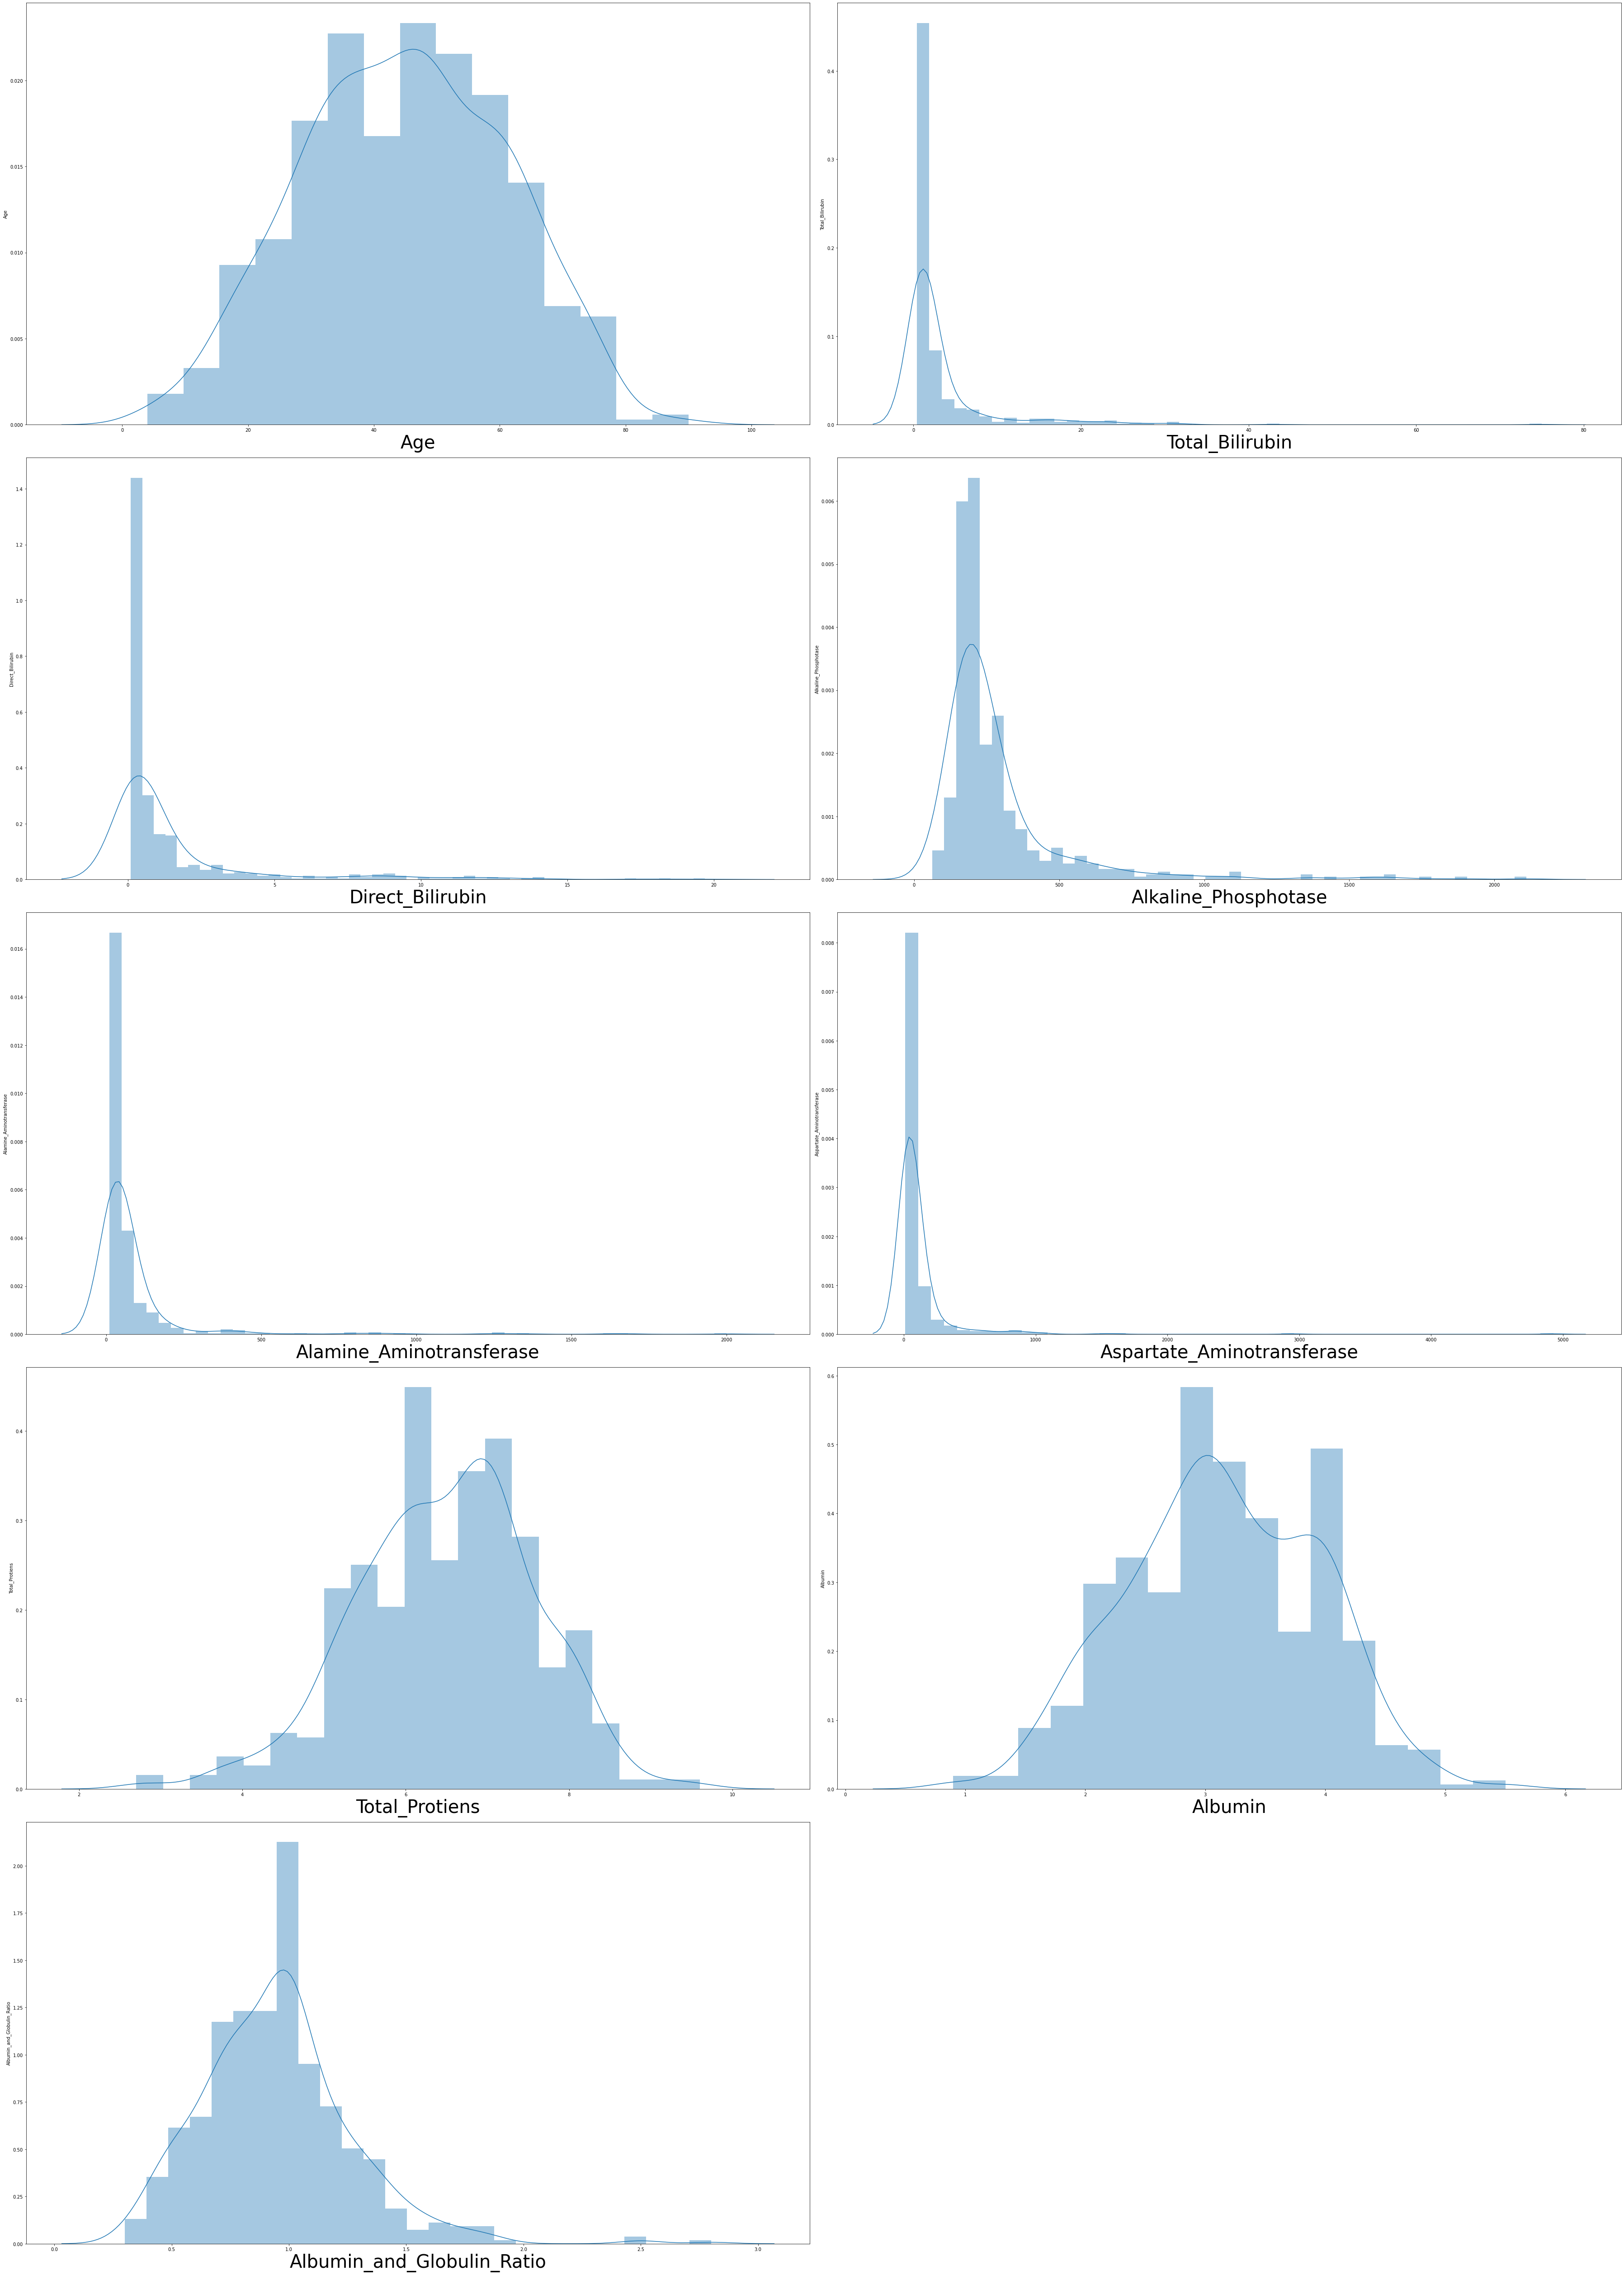

In [8]:
plt.figure(figsize=(50,70))
plot_number=1
for i in data.drop(['Dataset','Gender'],axis=1):
    if plot_number<=10:
        ax=plt.subplot(5,2,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize='40')
        plt.ylabel(i)
        plot_number+=1
plt.tight_layout()
    

As we can see most of the data is normally distributed except few columns.

And some of the columns have skewness

# Data Preprocessing

# Handling the missing values

In [9]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
data['Albumin_and_Globulin_Ratio'].value_counts()

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
0.71      1
0.88      1
2.80      1
1.36      1
0.53      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

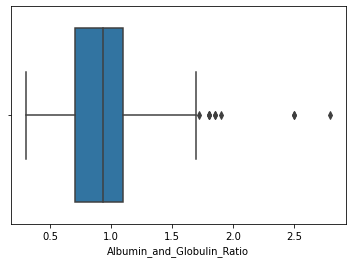

In [11]:
sns.boxplot(data=data, x= 'Albumin_and_Globulin_Ratio')

In [12]:
#as we can see the data is normally distributed but with some skewness its better to impute with median rather than mean
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [13]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [14]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [15]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

MALE VS FEMALE

<AxesSubplot:xlabel='Gender', ylabel='count'>

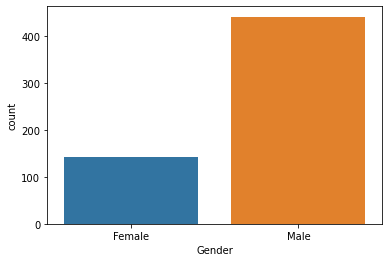

In [16]:
sns.countplot(data=data, x='Gender', label='count')

In [17]:
Male ,Female = data['Gender'].value_counts()
print('Number of patients that are male:',Male)
print('Number of patients that are female:',Female)

Number of patients that are male: 441
Number of patients that are female: 142


# Encoding the Gender Column

Label Male as 1 and Female as 0

In [18]:
def partition(x):
    if x == 'Male':
        return 1
    return 0
data['Gender']= data['Gender'].map(partition)

In [19]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Converting output dataset to 0's and 1's

In [20]:
def partition(x):
    if x ==  2:
        return 0
    return 1

data['Dataset']=data['Dataset'].map(partition)

In [21]:
data['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

# Correlation Matrix

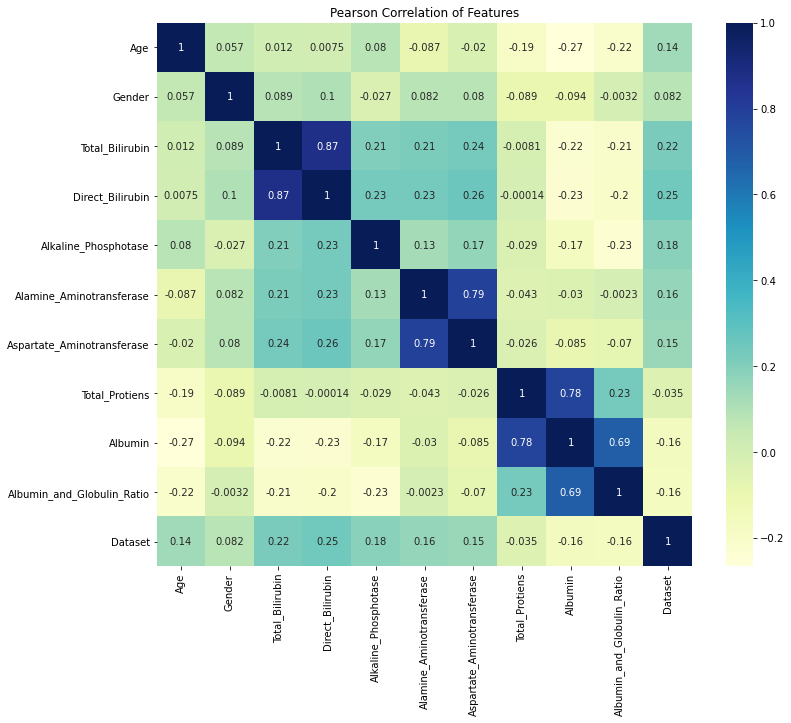

In [22]:
#Correlation using Heatmap:
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.savefig('fig2')
plt.show()

# Data Preparation

In [23]:
#X = data.iloc[: , :-1].values
#y = data.iloc[:,-1].values

In [24]:
X=data.drop('Dataset',axis=1)
y=data['Dataset']

# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=22,test_size=0.2)
#X_train.shape,X_test.shape,y_train.shape,y_test.shape
L_model.fit(X_train,y_train)
L_predictions = L_model.predict(X_test)
#L_predictions
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,classification_report
print("Accuracy: ",accuracy_score(y_test,L_predictions))
#print("Recall: ",recall_score(y_test,L_predictions))
#print("Precision: ",precision_score(y_test,L_predictions))
#print("f1_score: ",f1_score(y_test,L_predictions))
pd.crosstab(y_test, L_predictions)

Accuracy:  0.7094017094017094


col_0,0,1
Dataset,,
0,10,23
1,11,73


# feature selection to improve accuracy

In [26]:
x1 = data.drop(data.iloc[:,[1,-5,-4,-1]],axis = 1)
y1 = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,random_state=22,test_size=0.2)
L_model.fit(X_train,y_train)

L_predictions_train= L_model.predict(X_train)
L_predictions_test= L_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,L_predictions_train))
print("test Accuracy:",accuracy_score(y_test,L_predictions_test))
pd.crosstab(y_test, L_predictions)

Train Accuracy: 0.7360515021459227
test Accuracy: 0.7350427350427351


col_0,0,1
Dataset,,
0,10,23
1,11,73


# scaling methods
1.Standardscaler

2.Robustscaler

3.MinMaxScaler

4.MaxAbsScaler

standard scaler

In [27]:
from sklearn.preprocessing import StandardScaler
s_model = StandardScaler()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,random_state=22,test_size=0.2)

scaled_X_train = s_model.fit_transform(X_train)
scaled_X_test = s_model.transform(X_test)

L_model.fit(scaled_X_train,y_train)

St_Xtrain_prediction = L_model.predict(scaled_X_train)
St_Xtest_prediction = L_model.predict(scaled_X_test)

from sklearn.metrics import accuracy_score
print("Train Acuracy:",accuracy_score(y_train,St_Xtrain_prediction))
print("Test Accuracy:",accuracy_score(y_test,St_Xtest_prediction))


Train Acuracy: 0.7274678111587983
Test Accuracy: 0.7350427350427351


Robust scaler

In [28]:
from sklearn.preprocessing import RobustScaler
rb_model = RobustScaler()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,random_state=22,test_size=0.2)

rb_scaled_X_train = rb_model.fit_transform(X_train)
rb_scaled_X_test = rb_model.transform(X_test)

L_model.fit(rb_scaled_X_train,y_train)

rb_Xtrain_prediction = L_model.predict(rb_scaled_X_train)
rb_Xtest_prediction =  L_model.predict(rb_scaled_X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,rb_Xtrain_prediction))
print("Test Accuracy:",accuracy_score(y_test,rb_Xtest_prediction))

Train Accuracy: 0.7360515021459227
Test Accuracy: 0.7264957264957265


MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm_model = MinMaxScaler()

mm_scaled_Xtrain = mm_model.fit_transform(X_train)
mm_scaled_xtest  = mm_model.transform(X_test)

L_model.fit(mm_scaled_Xtrain,y_train)

mm_prediction_train = L_model.predict(mm_scaled_Xtrain)
mm_prediction_test  = L_model.predict(mm_scaled_xtest)

print("Train Accuracy: ",accuracy_score(y_train,mm_prediction_train))
print("test accuracy: ",accuracy_score(y_test,mm_prediction_test))

Train Accuracy:  0.7124463519313304
test accuracy:  0.7264957264957265


MaxabsSacler

In [30]:
from sklearn.preprocessing import MaxAbsScaler
ab_model = MaxAbsScaler()

ma_scaled_Xtrain = ab_model.fit_transform(X_train)
ma_scaled_Xtest  = ab_model.transform(X_test)

L_model.fit(ma_scaled_Xtrain,y_train)

ma_pred_train = L_model.predict(X_train)
ma_pred_test  = L_model.predict(X_test)

print("Train accuracy: ",accuracy_score(y_train,ma_pred_train))
print("Test accuracy : ",accuracy_score(y_test,ma_pred_test))

Train accuracy:  0.7124463519313304
Test accuracy :  0.717948717948718


# SMOTE

to remove imbalnce

In [31]:
!pip install imblearn 

In [32]:
from imblearn.over_sampling import SMOTE
oversampling =  SMOTE() 

X_train_over , y_train_over  = oversampling.fit_resample(X_train.astype('float'), y_train)
L_model.fit(X_train_over, y_train_over)

predicted_over_train = L_model.predict(X_train)
predicted_over_test = L_model.predict(X_test)

print("train accuracy: ",accuracy_score(y_train,predicted_over_train))
print("test accuracy : ",accuracy_score(y_test,predicted_over_test))

from sklearn.model_selection import cross_val_score

print("Cross-validation : ")

scores = cross_val_score(L_model,x1,y1,cv=5,scoring='accuracy')
print(scores)
print("Average Accuracy:",scores.mean())
print("Std :",scores.std())

train accuracy:  0.6502145922746781
test accuracy :  0.6752136752136753
Cross-validation : 
[0.7008547  0.73504274 0.70940171 0.71551724 0.75862069]
Average Accuracy: 0.7238874152667256
Std : 0.020694167910536472


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

DT_model.fit(X_train,y_train)

predict_train = DT_model.predict(X_train)
predict_test = DT_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train,predict_train))
print("Test Accuracy: ",accuracy_score(y_test,predict_test))

Train Accuracy:  1.0
Test Accuracy:  0.6285714285714286


# entropy as criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT_E_model = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=10)

DT_E_model.fit(X_train,y_train)

E_pred_train = DT_E_model.predict(X_train)
E_pred_test  = DT_E_model.predict(X_test)

print("Train Accuracy: ",accuracy_score(y_train,E_pred_train))
print("Test Accuracy:  ",accuracy_score(y_test,E_pred_test))

Train Accuracy:  0.7303921568627451
Test Accuracy:   0.6914285714285714


# Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
RDT_model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

RDT_model.fit(X_train, y_train)

rdt_predictions_train =  RDT_model.predict(X_train) 
rdt_predictions_test =  RDT_model.predict(X_test) 

print("Train Accuracy: ",accuracy_score(y_train,rdt_predictions_train))
print("Test Accurscy:  ",accuracy_score(y_test,rdt_predictions_test))

Train Accuracy:  1.0
Test Accurscy:   0.7008547008547008


# Hyperparameter tuning methods

1.GridSearchCV, 

2.RandomizedSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier
RDT_model = RandomForestClassifier()  

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth':[5,10,15,20,30],
              'random_state': [0,1,2,3,4],
              'n_estimators':[10,30,50,70,100,150] 
             }  

grid = GridSearchCV(RDT_model,parameters,cv=5,verbose=2)   #verbose --textual information
#grid = RandomizedSearchCV(RDT_model,parameters,cv=5)
grid.fit(X,y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=2; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, 

[CV] END ......max_depth=5, n_estimators=100, random_state=0; total time=   0.3s
[CV] END ......max_depth=5, n_estimators=100, random_state=0; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=0; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=0; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=1; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=1; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=1; total time=   0.2s
[CV] END ......max_depth=5, n_estimators=100, random_state=1; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=1; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=2; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=2; total time=   0.1s
[CV] END ......max_depth=5, n_estimators=100, random_state=2; total time=   0.2s
[CV] END ......max_depth=5, 

[CV] END ......max_depth=10, n_estimators=50, random_state=0; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=1; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=1; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=1; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=1; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=1; total time=   0.1s
[CV] END ......max_depth=10, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=10, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=10, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=10, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=10, n_estimators=50, random_state=2; total time=   0.0s
[CV] END ......max_depth=10, n_estimators=50, random_state=3; total time=   0.0s
[CV] END ......max_depth=10,

[CV] END ......max_depth=15, n_estimators=10, random_state=1; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=1; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=1; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=2; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=2; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=2; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=2; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=2; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=15, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=15,

[CV] END .....max_depth=15, n_estimators=100, random_state=1; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=2; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=2; total time=   0.3s
[CV] END .....max_depth=15, n_estimators=100, random_state=2; total time=   0.3s
[CV] END .....max_depth=15, n_estimators=100, random_state=2; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=2; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=3; total time=   0.4s
[CV] END .....max_depth=15, n_estimators=100, random_state=3; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=3; total time=   0.1s
[CV] END .....max_depth=15, n_estimators=100, random_state=3; total time=   0.3s
[CV] END .....max_depth=15, n_estimators=100, random_state=3; total time=   0.2s
[CV] END .....max_depth=15, n_estimators=100, random_state=4; total time=   0.2s
[CV] END .....max_depth=15, 

[CV] END ......max_depth=20, n_estimators=50, random_state=2; total time=   0.0s
[CV] END ......max_depth=20, n_estimators=50, random_state=2; total time=   0.0s
[CV] END ......max_depth=20, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=2; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=3; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=3; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=3; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=3; total time=   0.1s
[CV] END ......max_depth=20, n_estimators=50, random_state=3; total time=   0.0s
[CV] END ......max_depth=20, n_estimators=50, random_state=4; total time=   0.0s
[CV] END ......max_depth=20, n_estimators=50, random_state=4; total time=   0.0s
[CV] END ......max_depth=20, n_estimators=50, random_state=4; total time=   0.0s
[CV] END ......max_depth=20,

[CV] END ......max_depth=30, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=3; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=4; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=4; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=4; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=4; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=10, random_state=4; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=30, random_state=0; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=30, random_state=0; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=30, random_state=0; total time=   0.0s
[CV] END ......max_depth=30, n_estimators=30, random_state=0; total time=   0.0s
[CV] END ......max_depth=30,

[CV] END .....max_depth=30, n_estimators=100, random_state=3; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=100, random_state=4; total time=   0.3s
[CV] END .....max_depth=30, n_estimators=100, random_state=4; total time=   0.4s
[CV] END .....max_depth=30, n_estimators=100, random_state=4; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=100, random_state=4; total time=   0.1s
[CV] END .....max_depth=30, n_estimators=100, random_state=4; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=150, random_state=0; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=150, random_state=0; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=150, random_state=0; total time=   0.2s
[CV] END .....max_depth=30, n_estimators=150, random_state=0; total time=   0.3s
[CV] END .....max_depth=30, n_estimators=150, random_state=0; total time=   0.4s
[CV] END .....max_depth=30, n_estimators=150, random_state=1; total time=   0.3s
[CV] END .....max_depth=30, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'n_estimators': [10, 30, 50, 70, 100, 150],
                         'random_state': [0, 1, 2, 3, 4]},
             verbose=2)

In [37]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_depth': 15, 'n_estimators': 150, 'random_state': 4}
RandomForestClassifier(max_depth=15, n_estimators=150, random_state=4)
0.7254789272030651


# Kfold-cross validation

In [38]:
from sklearn.ensemble import RandomForestClassifier
RDTt_model = RandomForestClassifier(n_estimators=5,random_state=3,max_depth=5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

RDTt_model.fit(X_train, y_train)

rdt_predictions_train =  RDTt_model.predict(X_train) 
rdt_predictions_test =  RDTt_model.predict(X_test) 

print("Train Accuracy: ",accuracy_score(y_train,rdt_predictions_train))
print("Test Accurscy:  ",accuracy_score(y_test,rdt_predictions_test))

print(" ")
print("Cross-validation : ")

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RDTt_model,X,y,cv=5,scoring='accuracy')
print(scores)
print("Average Accuracy:",scores.mean())
print("Std :",scores.std())    # this model has above 5% standard deviation in accuracy--i,e.it is not a good model

Train Accuracy:  0.8261802575107297
Test Accurscy:   0.6923076923076923
 
Cross-validation : 
[0.70940171 0.74358974 0.71794872 0.62931034 0.75      ]
Average Accuracy: 0.7100501031535515
Std : 0.04313378917578669


# After tuning

In [39]:
from sklearn.ensemble import RandomForestClassifier
R_model = RandomForestClassifier(n_estimators=5,random_state=42,max_depth=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

R_model.fit(X_train, y_train)

rdt_predictions_train =  R_model.predict(X_train) 
rdt_predictions_test = R_model.predict(X_test) 

print("Train Accuracy: ",accuracy_score(y_train,rdt_predictions_train))
print("Test Accurscy:  ",accuracy_score(y_test,rdt_predictions_test))

print(" ")
print("Cross-validation : ")

from sklearn.model_selection import cross_val_score

scores = cross_val_score(R_model,X,y,cv=5,scoring='accuracy')
print(scores)
print("Average Accuracy:",scores.mean())
print("Std :",scores.std())

Train Accuracy:  0.7549019607843137
Test Accurscy:   0.6971428571428572
 
Cross-validation : 
[0.73504274 0.71794872 0.7008547  0.56034483 0.75      ]
Average Accuracy: 0.6928381962864723
Std : 0.06826124858014213


# BOOSTING TYPES
1.ADOBOOST

2.Gradient Boosting

3.XGBoost

AdoBoost ensemble Algorithm

In [40]:
from sklearn.ensemble import AdaBoostClassifier
A_model = AdaBoostClassifier(n_estimators=5,learning_rate=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

A_model.fit(X_train, y_train)

a_pred_train = A_model.predict(X_train)
a_pred_test  = A_model.predict(X_test)

print("Train Accuracy: ",accuracy_score(y_train,a_pred_train))
print("Test Accuracy : ",accuracy_score(y_test,a_pred_test))
print(" ")
print("Cross-validation : ")

from sklearn.model_selection import cross_val_score

scores = cross_val_score(A_model,X,y,cv=7,scoring="accuracy")
print(scores)
print("Average Accuracy: ",scores.mean())
print("std :",scores.std())

Train Accuracy:  0.7381974248927039
Test Accuracy :  0.7094017094017094
 
Cross-validation : 
[0.67857143 0.72619048 0.72289157 0.71084337 0.6746988  0.61445783
 0.72289157]
Average Accuracy:  0.6929350053274321
std : 0.037642995205392056


# Gradient Boost Algorithm

In [41]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7008547008547008
[[ 9 24]
 [11 73]]
              precision    recall  f1-score   support

           0       0.45      0.27      0.34        33
           1       0.75      0.87      0.81        84

    accuracy                           0.70       117
   macro avg       0.60      0.57      0.57       117
weighted avg       0.67      0.70      0.67       117



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
G_model = GradientBoostingClassifier(n_estimators=13
                                     ,learning_rate = 0.8, max_features=7, max_depth = 2,random_state=42)        

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

G_model.fit(X_train, y_train)

g_pred_train = G_model.predict(X_train)
g_pred_test  = G_model.predict(X_test)

print("Train accuracy : ",accuracy_score(y_train,g_pred_train))
print("Test accuacry : ",accuracy_score(y_test,g_pred_test))

print(" ")
print("Cross Validation :")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(G_model,X,y,cv=5,scoring="accuracy")
print(scores)
print("Average score : ",scores.mean())
print("std : ",scores.std())

Train accuracy :  0.8412017167381974
Test accuacry :  0.6324786324786325
 
Cross Validation :
[0.7008547  0.73504274 0.66666667 0.62068966 0.72413793]
Average score :  0.6894783377541998
std :  0.041615089890951966


# XGBoost

In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier
X_model  =  XGBClassifier(objective ='binary:logistic', max_depth = 3, learning_rate = 0.7, n_estimators = 7)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

X_model.fit(X_train, y_train)

X_pred_train=X_model.predict(X_train)
X_pred_test =X_model.predict(X_test)

print("Train Accuracy:",accuracy_score(X_pred_train,y_train))
print("Test Accuracy: ",accuracy_score(X_pred_test, y_test))

[15:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 0.8284313725490197
Test Accuracy:  0.6742857142857143


# KNN

scaling methods are used to improve the accuracy in KNN

smote -->to tuning imbalance

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=13)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

knn_model.fit(X_train,y_train)

k_pred_train = knn_model.predict(X_train)
k_pred_test = knn_model.predict(X_test)

print("Train Accuracy : ",accuracy_score(y_train,k_pred_train))
print("Test Accuracy  : ",accuracy_score(y_test,k_pred_test))

Train Accuracy :  0.7279411764705882
Test Accuracy  :  0.6742857142857143


# BEST SUITED ALGORITHM FOR THIS DATASET
***LogisticRegression

***RandomForest